In [1]:
import cv2
from patch_extraction import patch_extraction_proc
from transformation import cube_transformation
from patches_reordering import patches_reordering_process, rotate_90_x, rotate_90_y
from reverse_patches_reordering import reverse_patches_reordering_process, rotate_minus_90_x, rotate_minus_90_y
from chaotic_maps import lorenz_map, rossler_map, logistic_map
from encryption import scramble_img, diffuse_img
from decryption import Dediffuse_img, Descramble_img
from analysis import histogram, entropy_analysis

In [2]:
patch_size = 128
patch_extraction_proc(512,patch_size,8,'im512/')
cube_R, cube_G, cube_B = cube_transformation(patch_size)
cube_shape = cube_R.shape

All patches saved successfully.


In [3]:
# Generate Lorenz scramble maps
lorenz_scramble_params = [32.420367336273195, 26.558972072601318, 24.29333438873291]
lorenz_scrambles = [lorenz_map(cube_shape, param) for param in lorenz_scramble_params]

# Step 1: Initial scrambling and reordering
permuted_planes = [patches_reordering_process(cube, scramble)
                   for cube, scramble in zip([cube_R, cube_G, cube_B], lorenz_scrambles[0])]
rotated_cubes = [rotate_90_x(plane[0]) for plane in permuted_planes]

# Step 2: Second scrambling and reordering
# Unpack scrambles for R, G, B channels
scramble_R2, scramble_G2, scramble_B2 = lorenz_scrambles[1]

permuted_rotated_cubes_x = [
    patches_reordering_process(rotated_cube, scramble)[0]
    for rotated_cube, scramble in zip(rotated_cubes, [scramble_R2, scramble_G2, scramble_B2])
]
rotated2_cubes = [rotate_90_y(cube) for cube in permuted_rotated_cubes_x]

# Step 3: Final scrambling and reordering
scramble_R3, scramble_G3, scramble_B3 = lorenz_scrambles[2]

permuted_rotated_cubes_y = [
    patches_reordering_process(rotated2_cube, scramble)
    for rotated2_cube, scramble in zip(rotated2_cubes, [scramble_R3, scramble_G3, scramble_B3])
]
# Access the scrambled cubes from the tuple
scrambled_R_cube = permuted_rotated_cubes_y[0][0]  # Extract the scrambled R cube
scrambled_G_cube = permuted_rotated_cubes_y[1][0]  # Extract the scrambled G cube
scrambled_B_cube = permuted_rotated_cubes_y[2][0]  # Extract the scrambled B cube


In [4]:
rossler_Scramble_R,rossler_Scramble_G,rossler_Scramble_B= rossler_map(cube_shape,27.757557932535804);
fiusion_R = scramble_img(scrambled_R_cube,(rossler_Scramble_R/pow(10,9)))
fiusion_G = scramble_img(scrambled_G_cube,(rossler_Scramble_G/pow(10,9)))
fiusion_B = scramble_img(scrambled_B_cube,(rossler_Scramble_B/pow(10,9)))

In [5]:
logistic_diff_R,logistic_diff_G,logistic_diff_B= logistic_map(cube_shape,27.757557932535804);
diffused_image_R = diffuse_img(fiusion_R,logistic_diff_R);
diffused_image_G = diffuse_img(fiusion_G,logistic_diff_G);
diffused_image_B = diffuse_img(fiusion_B,logistic_diff_B);

# Analysis

<h3>Histogram <h3>

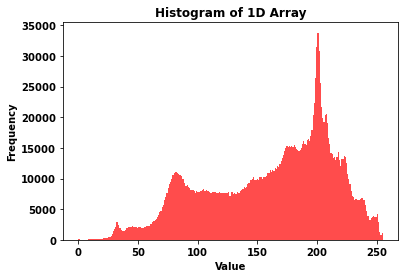

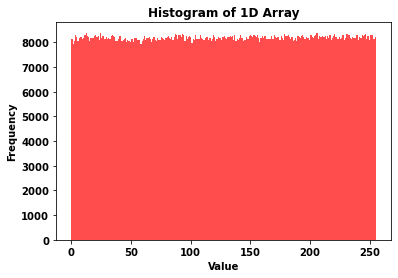

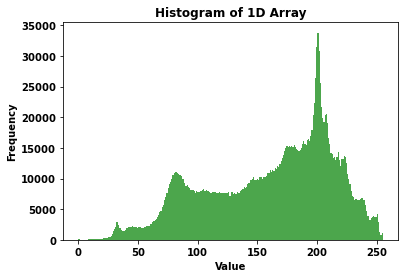

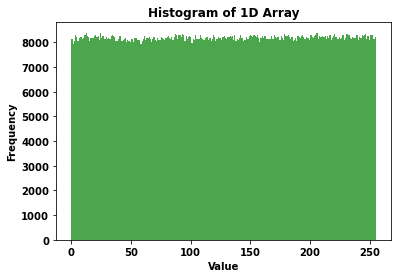

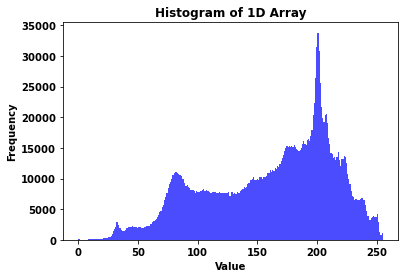

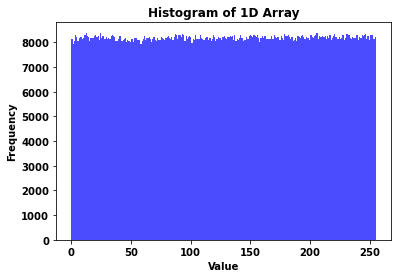

In [6]:
#Red Channel
histogram(cube_R,'r')
histogram(diffused_image_R,'r')

#Green Channel
histogram(cube_R,'g')
histogram(diffused_image_R,'g')

#Blue Channel
histogram(cube_R,'b')
histogram(diffused_image_R,'b')

<h3> Entropy <h3>

In [7]:
print(f"Entropy of the Plain_R: {entropy_analysis(cube_R)}, Entropy of the Cipher_R:{entropy_analysis(diffused_image_R)} ")
print(f"Entropy of the Plain_R: {entropy_analysis(cube_G)}, Entropy of the Cipher_R:{entropy_analysis(diffused_image_G)} ")
print(f"Entropy of the Plain_R: {entropy_analysis(cube_B)}, Entropy of the Cipher_R:{entropy_analysis(diffused_image_B)} ")


Entropy of the Plain_R: 7.5778, Entropy of the Cipher_R:7.9999 
Entropy of the Plain_R: 7.7643, Entropy of the Cipher_R:7.9999 
Entropy of the Plain_R: 7.6474, Entropy of the Cipher_R:7.9999 


# Decryption Process

In [6]:
dediffused_image_R = Dediffuse_img(diffused_image_R,logistic_diff_R);
dediffused_image_G = Dediffuse_img(diffused_image_G,logistic_diff_G);
dediffused_image_B = Dediffuse_img(diffused_image_B,logistic_diff_B);

In [7]:
defiusion_R = Descramble_img(dediffused_image_R,(rossler_Scramble_R/pow(10,9)))
defiusion_G = Descramble_img(dediffused_image_G,(rossler_Scramble_G/pow(10,9)))
defiusion_B = Descramble_img(dediffused_image_B,(rossler_Scramble_B/pow(10,9)))
permuted_rotated_cubes_y= [defiusion_R, defiusion_G, defiusion_B]

In [11]:
# Step 3: Reverse Final Scrambling and Reordering
# Use the reverse of the third Lorenz scramble
depermuted_rotated_cubes_y = [
    reverse_patches_reordering_process(permuted_rotated_cubes_y, scramble)[0]
    for permuted_rotated_cubes_y, scramble in zip(rotated2_cubes, [lorenz_scrambles[2][0], lorenz_scrambles[2][1], lorenz_scrambles[2][2]])
]

# Reverse rotation (90° along y-axis)
derotated2_cubes = [rotate_minus_90_y(cube) for cube in depermuted_rotated_cubes_y]

# Step 2: Reverse Second Scrambling and Reordering
# Use the reverse of the second Lorenz scramble
depermuted_rotated_cubes_x = [
    reverse_patches_reordering_process(derotated2_cube, scramble)[0]
    for derotated2_cube, scramble in zip(derotated2_cubes, [lorenz_scrambles[1][0], lorenz_scrambles[1][1], lorenz_scrambles[1][2]])
]

# Reverse rotation (90° along x-axis)
derotated_cubes = [rotate_minus_90_x(cube) for cube in depermuted_rotated_cubes_x]

# Step 1: Reverse Initial Scrambling and Reordering
# Use the reverse of the first Lorenz scramble
depermuted_planes = [
    reverse_patches_reordering_process(derotated_cube, scramble)[0]
    for derotated_cube, scramble in zip(derotated_cubes, [lorenz_scrambles[0][0], lorenz_scrambles[0][1], lorenz_scrambles[0][2]])
]

# Now you have the depermuted cubes for R, G, B channels
depermuted_cube_R, depermuted_cube_G, depermuted_cube_B = depermuted_planes


In [ ]:
for i in range(128):
    cv2.imwrite(f"output_patches_R/{i+1}.png",  depermuted_cube_R[i])
    cv2.imwrite(f"output_patches_G/{i+1}.png",  depermuted_cube_G[i])
    cv2.imwrite(f"output_patches_B/{i+1}.png",  depermuted_cube_B[i])
